In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 2
2023-07-02 15:30:45.168246


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1031.2534)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(6.2977)tensor(6.1223)tensor(4.7414)tensor(5.9785)tensor(4.6874)tensor(4.5478)tensor(3.6252)tensor(3.6588)tensor(7.4924)tensor(8.7246)tensor(5.6641)tensor(3.1039)tensor(6.4649)tensor(3.6644)tensor(5.2711)tensor(4.6385)tensor(6.1478)tensor(3.8548)tensor(2.9872)tensor(5.0505)tensor(4.4970)tensor(7.4727)tensor(4.8885)tensor(3.3612)tensor(6.6759)tensor(3.2322)tensor(15.)tensor(5.3272)tensor(2.8184)tensor(4.5723)tensor(8.6426)tensor(3.3496)tensor(15.)tensor(6.5195)tensor(4.7316)tensor(4.2048)tensor(3.1767)tensor(7.8074)tensor(5.4128)tensor(4.6476)tensor(7.6800)tensor(5.0756)tensor(6.0923)tensor(7.7580)tensor(8.8669)tensor(4.1585)tensor(4.9540)tensor(3.2902)tensor(4.6550)tensor(9.4043)tensor(3.3737)tensor(4.1449)tensor(4.0551)tensor(7.3105)tensor(2.7963)tensor(6.8847)tensor(3.1209)tensor(6.0418)tensor(3.3400)tensor(4.4593)tensor(7.5744)tensor(6.7305)tensor(3.3485)tensor(6.6237)tensor(4.9417)tensor(6.3643)tensor(4.2853)tensor(3.8530)tensor(6.2836)tensor(6.6636)tensor(8.2769)tensor(4.954

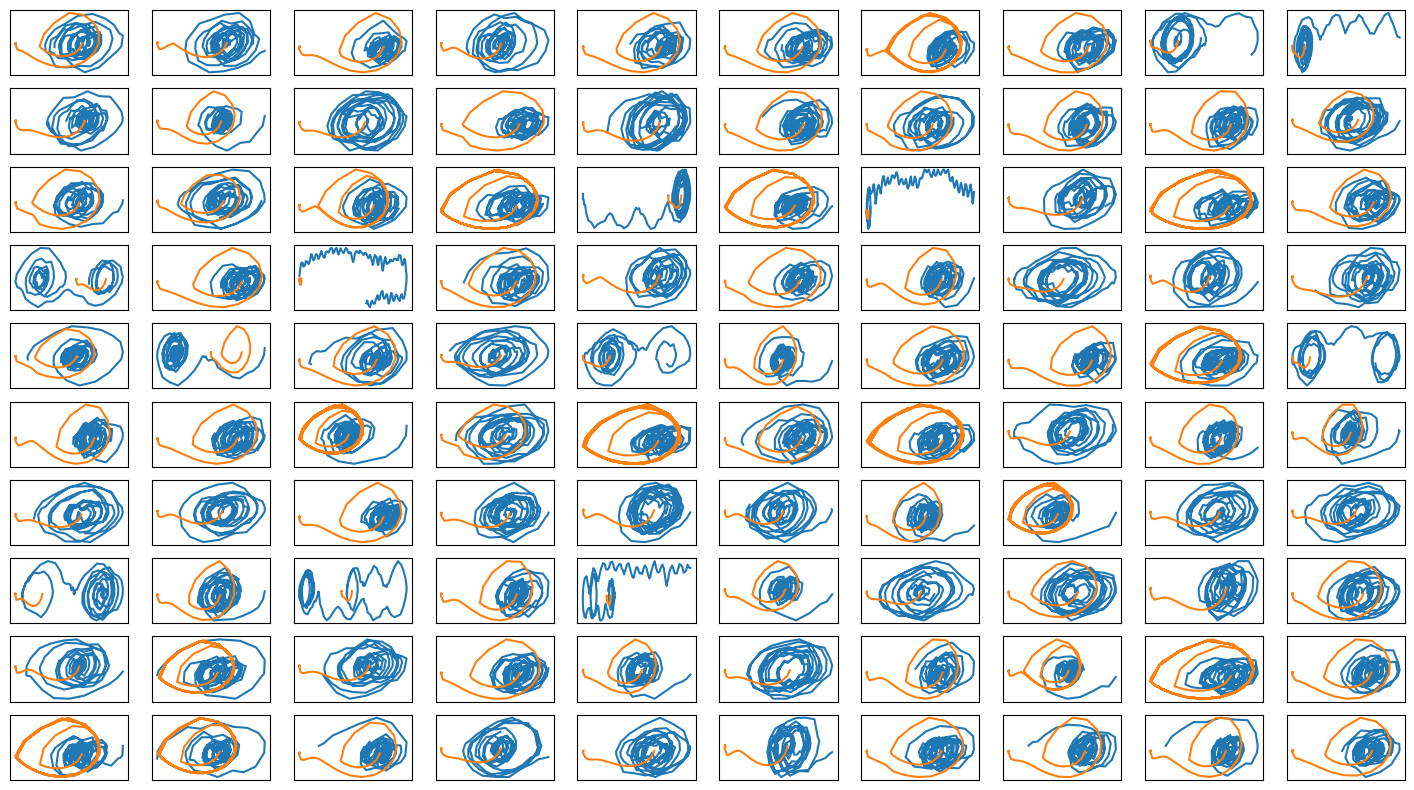

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 279573.22228  validloss 586.47431±0.00000  bestvalidloss 586.47431  last_update 0
train: iter 1  trainloss 86817.61276  validloss 484.45144±0.00000  bestvalidloss 484.45144  last_update 0
train: iter 2  trainloss 1807.75466  validloss 447.84050±0.00000  bestvalidloss 447.84050  last_update 0
train: iter 3  trainloss 939.45284  validloss 432.88093±0.00000  bestvalidloss 432.88093  last_update 0
train: iter 4  trainloss 660.89511  validloss 402.05925±0.00000  bestvalidloss 402.05925  last_update 0
train: iter 5  trainloss 490.33133  validloss 356.25917±0.00000  bestvalidloss 356.25917  last_update 0
train: iter 6  trainloss 1212.01371  validloss 324.61974±0.00000  bestvalidloss 324.61974  last_update 0
train: iter 7  trainloss 6830.51695  validloss 300.70425±0.00000  bestvalidloss 300.70425  last_update 0
train: iter 8  trainloss 671.46954  validloss 403.87634±0.00000  bestvalidloss 300.70425  last_update 1
train: iter 9  trainloss 572.80345  v

train: iter 77  trainloss -531.91982  validloss -580.71369±0.00000  bestvalidloss -581.77282  last_update 3
train: iter 78  trainloss -537.33876  validloss -588.82471±0.00000  bestvalidloss -588.82471  last_update 0
train: iter 79  trainloss -541.13635  validloss -589.23118±0.00000  bestvalidloss -589.23118  last_update 0
train: iter 80  trainloss -533.54964  validloss -523.11620±0.00000  bestvalidloss -589.23118  last_update 1
train: iter 81  trainloss -549.74327  validloss -531.44390±0.00000  bestvalidloss -589.23118  last_update 2
train: iter 82  trainloss -555.03571  validloss -576.82950±0.00000  bestvalidloss -589.23118  last_update 3
train: iter 83  trainloss -445.49933  validloss -432.12281±0.00000  bestvalidloss -589.23118  last_update 4
train: iter 84  trainloss -521.81663  validloss -608.74276±0.00000  bestvalidloss -608.74276  last_update 0
train: iter 85  trainloss -545.76272  validloss -587.55686±0.00000  bestvalidloss -608.74276  last_update 1
train: iter 86  trainloss -5

train: iter 153  trainloss -572.58580  validloss -705.57607±0.00000  bestvalidloss -723.23821  last_update 21
train: iter 154  trainloss -614.82093  validloss -692.73457±0.00000  bestvalidloss -723.23821  last_update 22
train: iter 155  trainloss -643.13749  validloss -725.58721±0.00000  bestvalidloss -725.58721  last_update 0
train: iter 156  trainloss -580.28582  validloss -666.60477±0.00000  bestvalidloss -725.58721  last_update 1
train: iter 157  trainloss -602.71023  validloss -693.74512±0.00000  bestvalidloss -725.58721  last_update 2
train: iter 158  trainloss -628.39624  validloss -736.87992±0.00000  bestvalidloss -736.87992  last_update 0
train: iter 159  trainloss -592.09026  validloss -731.38033±0.00000  bestvalidloss -736.87992  last_update 1
train: iter 160  trainloss -626.60695  validloss -723.28144±0.00000  bestvalidloss -736.87992  last_update 2
train: iter 161  trainloss -639.35288  validloss -712.95797±0.00000  bestvalidloss -736.87992  last_update 3
train: iter 162  

train: iter 230  trainloss -662.40713  validloss -765.16810±0.00000  bestvalidloss -770.55268  last_update 8
train: iter 231  trainloss -645.24164  validloss -762.16875±0.00000  bestvalidloss -770.55268  last_update 9
train: iter 232  trainloss -649.21629  validloss -770.53304±0.00000  bestvalidloss -770.55268  last_update 10
train: iter 233  trainloss -647.06526  validloss -686.33439±0.00000  bestvalidloss -770.55268  last_update 11
train: iter 234  trainloss -647.76338  validloss -726.02668±0.00000  bestvalidloss -770.55268  last_update 12
train: iter 235  trainloss -634.64132  validloss -744.03758±0.00000  bestvalidloss -770.55268  last_update 13
train: iter 236  trainloss -645.24453  validloss -647.02322±0.00000  bestvalidloss -770.55268  last_update 14
train: iter 237  trainloss -652.28186  validloss -729.40986±0.00000  bestvalidloss -770.55268  last_update 15
train: iter 238  trainloss -606.13633  validloss -569.93210±0.00000  bestvalidloss -770.55268  last_update 16
train: iter 

train: iter 305  trainloss -666.58492  validloss -802.81837±0.00000  bestvalidloss -809.83400  last_update 17
train: iter 306  trainloss -686.06053  validloss -799.43963±0.00000  bestvalidloss -809.83400  last_update 18
train: iter 307  trainloss -688.19421  validloss -778.17818±0.00000  bestvalidloss -809.83400  last_update 19
train: iter 308  trainloss -688.80163  validloss -795.95890±0.00000  bestvalidloss -809.83400  last_update 20
train: iter 309  trainloss -637.01774  validloss -795.94223±0.00000  bestvalidloss -809.83400  last_update 21
train: iter 310  trainloss -636.42492  validloss -640.66774±0.00000  bestvalidloss -809.83400  last_update 22
train: iter 311  trainloss -678.28732  validloss -802.27208±0.00000  bestvalidloss -809.83400  last_update 23
train: iter 312  trainloss -673.11860  validloss -795.88179±0.00000  bestvalidloss -809.83400  last_update 24
train: iter 313  trainloss -689.57229  validloss -789.16461±0.00000  bestvalidloss -809.83400  last_update 25
train: ite

train: iter 380  trainloss -621.62988  validloss -797.27065±0.00000  bestvalidloss -826.01168  last_update 22
train: iter 381  trainloss -676.57607  validloss -814.60483±0.00000  bestvalidloss -826.01168  last_update 23
train: iter 382  trainloss -680.05366  validloss -830.59558±0.00000  bestvalidloss -830.59558  last_update 0
train: iter 383  trainloss -661.76762  validloss -794.83210±0.00000  bestvalidloss -830.59558  last_update 1
train: iter 384  trainloss -670.22323  validloss -779.50650±0.00000  bestvalidloss -830.59558  last_update 2
train: iter 385  trainloss -696.09063  validloss -818.55991±0.00000  bestvalidloss -830.59558  last_update 3
train: iter 386  trainloss -692.40452  validloss -766.37038±0.00000  bestvalidloss -830.59558  last_update 4
train: iter 387  trainloss -704.67051  validloss -803.81043±0.00000  bestvalidloss -830.59558  last_update 5
train: iter 388  trainloss -702.52046  validloss -812.16609±0.00000  bestvalidloss -830.59558  last_update 6
train: iter 389  

train: iter 455  trainloss -699.84058  validloss -814.53101±0.00000  bestvalidloss -842.44401  last_update 21
train: iter 456  trainloss -714.95083  validloss -820.76012±0.00000  bestvalidloss -842.44401  last_update 22
train: iter 457  trainloss -708.61250  validloss -801.66341±0.00000  bestvalidloss -842.44401  last_update 23
train: iter 458  trainloss -725.12047  validloss -815.90905±0.00000  bestvalidloss -842.44401  last_update 24
train: iter 459  trainloss -712.74029  validloss -833.07696±0.00000  bestvalidloss -842.44401  last_update 25
train: iter 460  trainloss -723.91858  validloss -820.98843±0.00000  bestvalidloss -842.44401  last_update 26
train: iter 461  trainloss -721.18263  validloss -814.11169±0.00000  bestvalidloss -842.44401  last_update 27
train: iter 462  trainloss -724.09034  validloss -815.25139±0.00000  bestvalidloss -842.44401  last_update 28
train: iter 463  trainloss -708.20416  validloss -836.57027±0.00000  bestvalidloss -842.44401  last_update 29
train: ite

train: iter 530  trainloss -689.88228  validloss -852.56064±0.00000  bestvalidloss -852.56064  last_update 0
train: iter 531  trainloss -739.98537  validloss -820.36519±0.00000  bestvalidloss -852.56064  last_update 1
train: iter 532  trainloss -747.10580  validloss -829.75720±0.00000  bestvalidloss -852.56064  last_update 2
train: iter 533  trainloss -725.29124  validloss -796.06248±0.00000  bestvalidloss -852.56064  last_update 3
train: iter 534  trainloss -723.14697  validloss -823.89728±0.00000  bestvalidloss -852.56064  last_update 4
train: iter 535  trainloss -733.66994  validloss -850.22329±0.00000  bestvalidloss -852.56064  last_update 5
train: iter 536  trainloss -730.38814  validloss -845.70346±0.00000  bestvalidloss -852.56064  last_update 6
train: iter 537  trainloss -703.04549  validloss -824.51468±0.00000  bestvalidloss -852.56064  last_update 7
train: iter 538  trainloss -722.19972  validloss -838.19655±0.00000  bestvalidloss -852.56064  last_update 8
train: iter 539  tr

train: iter 605  trainloss -718.34350  validloss -851.58900±0.00000  bestvalidloss -860.95759  last_update 3
train: iter 606  trainloss -738.48270  validloss -852.42570±0.00000  bestvalidloss -860.95759  last_update 4
train: iter 607  trainloss -719.31495  validloss -805.29177±0.00000  bestvalidloss -860.95759  last_update 5
train: iter 608  trainloss -712.44970  validloss -745.47818±0.00000  bestvalidloss -860.95759  last_update 6
train: iter 609  trainloss -728.64872  validloss -827.95788±0.00000  bestvalidloss -860.95759  last_update 7
train: iter 610  trainloss -719.88053  validloss -806.31357±0.00000  bestvalidloss -860.95759  last_update 8
train: iter 611  trainloss -706.38257  validloss -831.55642±0.00000  bestvalidloss -860.95759  last_update 9
train: iter 612  trainloss -735.53837  validloss -847.06655±0.00000  bestvalidloss -860.95759  last_update 10
train: iter 613  trainloss -741.25784  validloss -845.41049±0.00000  bestvalidloss -860.95759  last_update 11
train: iter 614  

train: iter 681  trainloss -749.13848  validloss -857.59400±0.00000  bestvalidloss -863.65719  last_update 9
train: iter 682  trainloss -735.90072  validloss -860.99450±0.00000  bestvalidloss -863.65719  last_update 10
train: iter 683  trainloss -697.15490  validloss -774.94548±0.00000  bestvalidloss -863.65719  last_update 11
train: iter 684  trainloss -746.91724  validloss -785.89698±0.00000  bestvalidloss -863.65719  last_update 12
train: iter 685  trainloss -741.35477  validloss -862.92764±0.00000  bestvalidloss -863.65719  last_update 13
train: iter 686  trainloss -744.00058  validloss -856.80215±0.00000  bestvalidloss -863.65719  last_update 14
train: iter 687  trainloss -753.32962  validloss -827.45773±0.00000  bestvalidloss -863.65719  last_update 15
train: iter 688  trainloss -757.28580  validloss -837.62058±0.00000  bestvalidloss -863.65719  last_update 16
train: iter 689  trainloss -740.65221  validloss -852.02400±0.00000  bestvalidloss -863.65719  last_update 17
train: iter

train: iter 756  trainloss -751.60416  validloss -835.92057±0.00000  bestvalidloss -872.22110  last_update 5
train: iter 757  trainloss -752.18510  validloss -824.35578±0.00000  bestvalidloss -872.22110  last_update 6
train: iter 758  trainloss -741.27499  validloss -849.13138±0.00000  bestvalidloss -872.22110  last_update 7
train: iter 759  trainloss -732.46258  validloss -842.50033±0.00000  bestvalidloss -872.22110  last_update 8
train: iter 760  trainloss -718.13520  validloss -851.07847±0.00000  bestvalidloss -872.22110  last_update 9
train: iter 761  trainloss -718.97026  validloss -837.08584±0.00000  bestvalidloss -872.22110  last_update 10
train: iter 762  trainloss -753.95225  validloss -774.27209±0.00000  bestvalidloss -872.22110  last_update 11
train: iter 763  trainloss -750.92186  validloss -823.81842±0.00000  bestvalidloss -872.22110  last_update 12
train: iter 764  trainloss -750.72647  validloss -844.37034±0.00000  bestvalidloss -872.22110  last_update 13
train: iter 765

train: iter 832  trainloss -747.63830  validloss -849.72759±0.00000  bestvalidloss -872.22110  last_update 81
train: iter 833  trainloss -746.96234  validloss -804.27871±0.00000  bestvalidloss -872.22110  last_update 82
train: iter 834  trainloss -725.88897  validloss -790.94888±0.00000  bestvalidloss -872.22110  last_update 83
train: iter 835  trainloss -755.24072  validloss -837.47753±0.00000  bestvalidloss -872.22110  last_update 84
train: iter 836  trainloss -761.87181  validloss -858.44603±0.00000  bestvalidloss -872.22110  last_update 85
train: iter 837  trainloss -754.37481  validloss -861.44812±0.00000  bestvalidloss -872.22110  last_update 86
train: iter 838  trainloss -751.71304  validloss -869.12090±0.00000  bestvalidloss -872.22110  last_update 87
train: iter 839  trainloss -754.30958  validloss -847.76839±0.00000  bestvalidloss -872.22110  last_update 88
train: iter 840  trainloss -756.91966  validloss -872.12835±0.00000  bestvalidloss -872.22110  last_update 89
train: ite

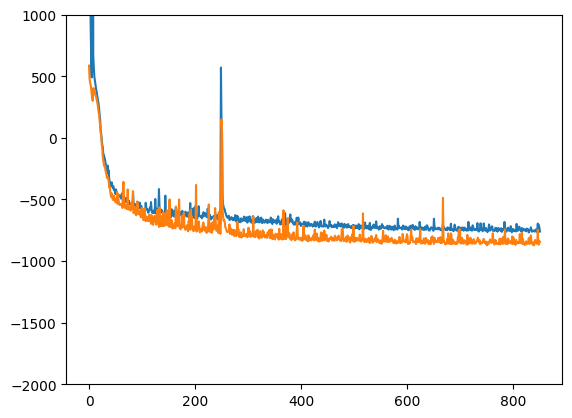

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

実環境方策rollout vs Sim環境方策rollout


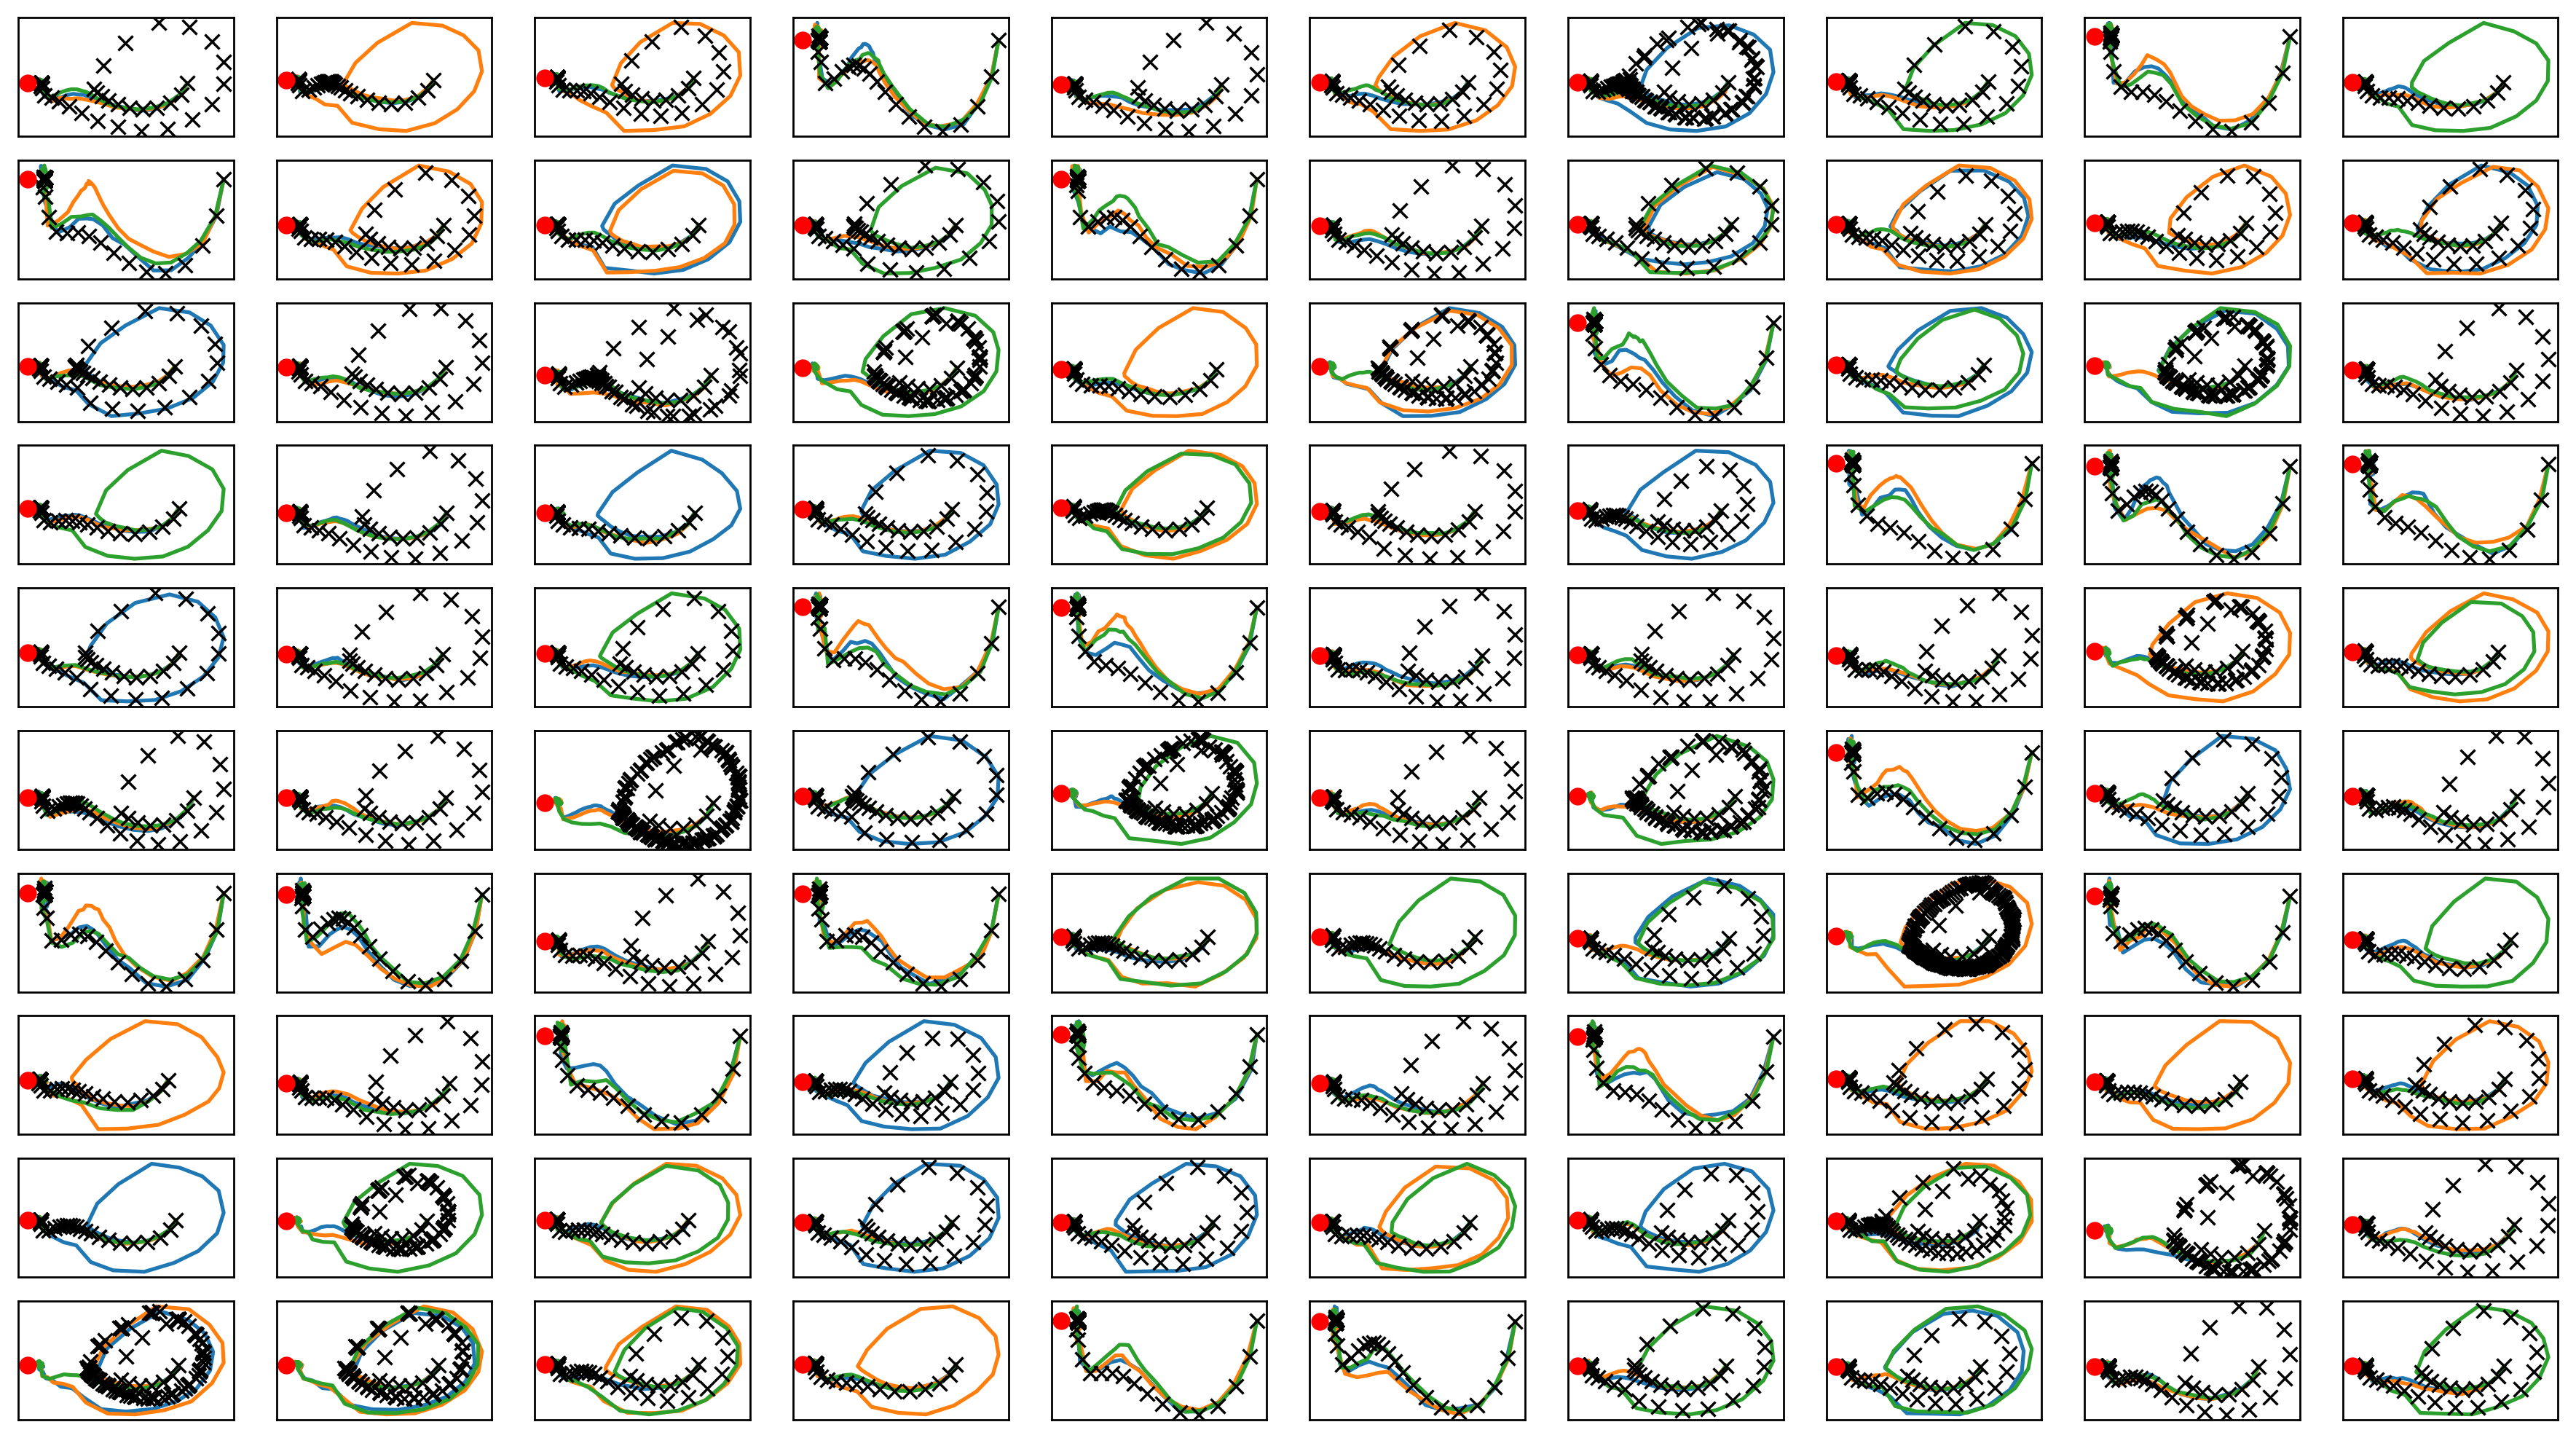

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

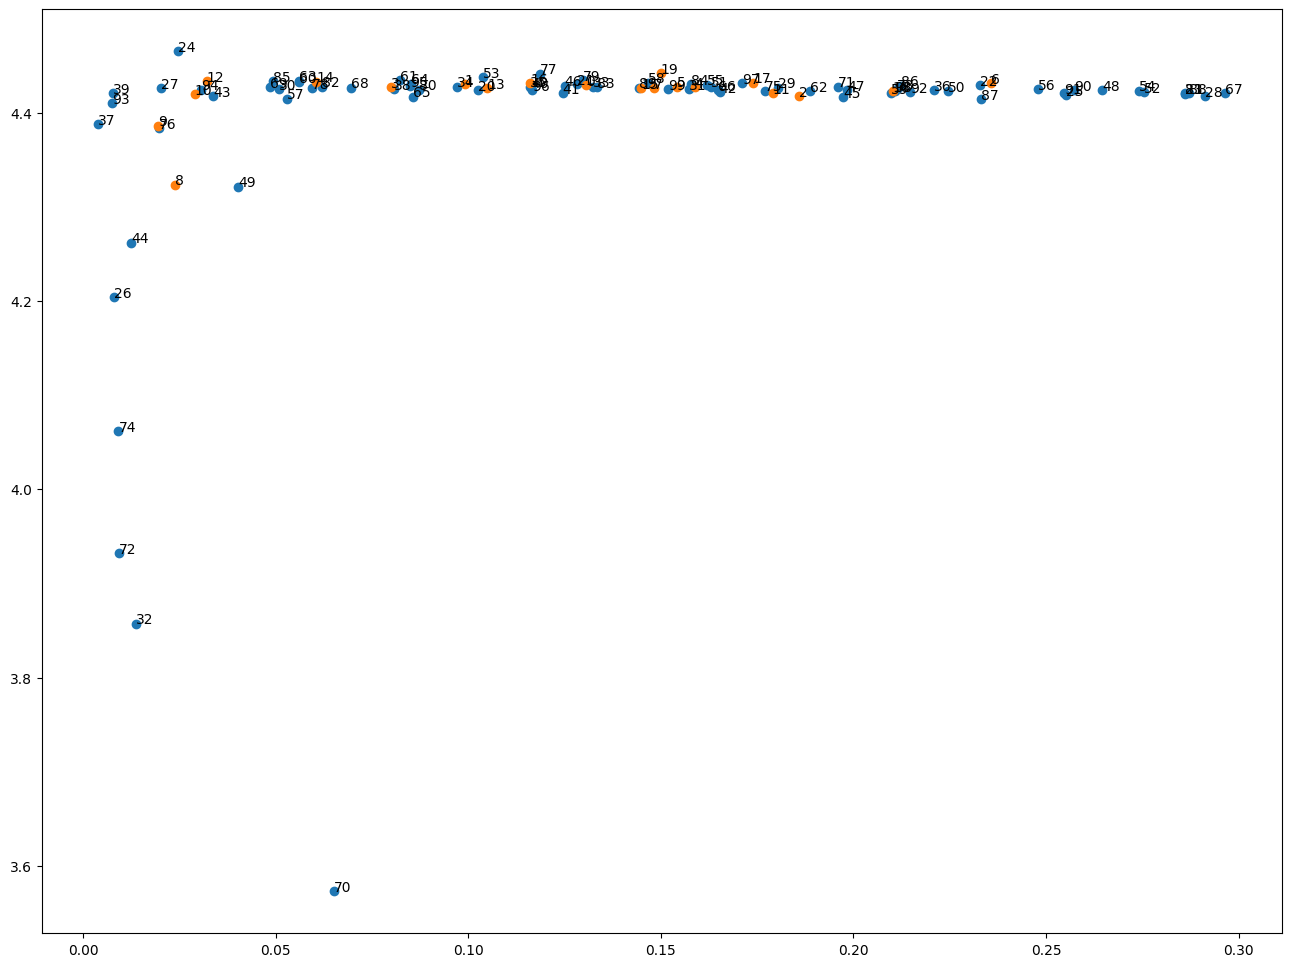

[0.13059672 0.09910045 0.18578129 0.08004818 0.15874263 0.15407344
 0.23560054 0.14827105 0.02389364 0.01958595 0.02895927 0.17902359
 0.03208371 0.10494789 0.06052297 0.14492095 0.1160678  0.17400125
 0.2102257  0.15000251 0.1024841  0.12826379 0.23296776 0.28612267
 0.02462848 0.25525515 0.00816071 0.02014331 0.29117409 0.18054514
 0.05076763 0.15722006 0.01370369 0.13240648 0.0970624  0.11606697
 0.22102412 0.0039052  0.08081664 0.00766528 0.11625703 0.12447175
 0.16529337 0.03383286 0.01253931 0.19725372 0.12502603 0.1984444
 0.26449567 0.04018626 0.22463336 0.16300357 0.27553759 0.10387137
 0.27417464 0.16205745 0.24787495 0.05301365 0.14677985 0.20985619
 0.05598814 0.08221778 0.18880792 0.05618596 0.08512674 0.08568112
 0.16484905 0.29655291 0.06963548 0.04843997 0.06522073 0.19590615
 0.00937427 0.21138825 0.00917684 0.1769346  0.0196991  0.11854523
 0.05940813 0.12971673 0.08712802 0.28609799 0.06211495 0.13337228
 0.15771997 0.04932573 0.21239135 0.2331309  0.28702428 0.14443

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


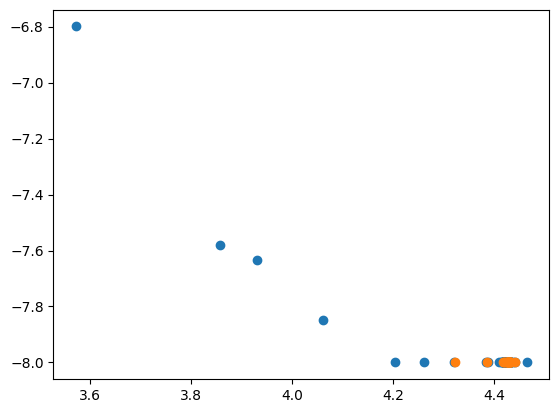

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 10.04456  validloss 10.67449±0.00000  bestvalidloss 10.67449  last_update 0
train: iter 1  trainloss 9.12535  validloss 9.67766±0.00000  bestvalidloss 9.67766  last_update 0
train: iter 2  trainloss 8.33440  validloss 8.81534±0.00000  bestvalidloss 8.81534  last_update 0
train: iter 3  trainloss 7.66151  validloss 8.05034±0.00000  bestvalidloss 8.05034  last_update 0
train: iter 4  trainloss 7.07948  validloss 7.43911±0.00000  bestvalidloss 7.43911  last_update 0
train: iter 5  trainloss 6.57130  validloss 6.88887±0.00000  bestvalidloss 6.88887  last_update 0
train: iter 6  trainloss 6.12776  validloss 6.43262±0.00000  bestvalidloss 6.43262  last_update 0
train: iter 7  trainloss 5.74867  validloss 5.99079±0.00000  bestvalidloss 5.99079  last_update 0
train: iter 8  trainloss 5.40325  validloss 5.64150±0.00000  bestvalidloss 5.64150  last_update 0
train: iter 9  trainloss 5.09943  validloss 5.30895±0.00000  bestvalidloss 5.30895  last_update 0
train: iter 10  t

train: iter 86  trainloss 0.79661  validloss 0.81111±0.00000  bestvalidloss 0.81111  last_update 0
train: iter 87  trainloss 0.75422  validloss 0.76717±0.00000  bestvalidloss 0.76717  last_update 0
train: iter 88  trainloss 0.71261  validloss 0.72216±0.00000  bestvalidloss 0.72216  last_update 0
train: iter 89  trainloss 0.67007  validloss 0.67946±0.00000  bestvalidloss 0.67946  last_update 0
train: iter 90  trainloss 0.63005  validloss 0.63678±0.00000  bestvalidloss 0.63678  last_update 0
train: iter 91  trainloss 0.59031  validloss 0.59496±0.00000  bestvalidloss 0.59496  last_update 0
train: iter 92  trainloss 0.55241  validloss 0.55380±0.00000  bestvalidloss 0.55380  last_update 0
train: iter 93  trainloss 0.51412  validloss 0.51497±0.00000  bestvalidloss 0.51497  last_update 0
train: iter 94  trainloss 0.47306  validloss 0.47231±0.00000  bestvalidloss 0.47231  last_update 0
train: iter 95  trainloss 0.43666  validloss 0.43276±0.00000  bestvalidloss 0.43276  last_update 0
train: ite

train: iter 167  trainloss -0.56861  validloss -0.87673±0.00000  bestvalidloss -0.88290  last_update 1
train: iter 168  trainloss -0.52677  validloss -0.89164±0.00000  bestvalidloss -0.89164  last_update 0
train: iter 169  trainloss -0.56691  validloss -0.89027±0.00000  bestvalidloss -0.89164  last_update 1
train: iter 170  trainloss -0.59099  validloss -0.90278±0.00000  bestvalidloss -0.90278  last_update 0
train: iter 171  trainloss -0.56158  validloss -0.91623±0.00000  bestvalidloss -0.91623  last_update 0
train: iter 172  trainloss -0.54703  validloss -0.89484±0.00000  bestvalidloss -0.91623  last_update 1
train: iter 173  trainloss -0.54615  validloss -0.90085±0.00000  bestvalidloss -0.91623  last_update 2
train: iter 174  trainloss -0.58230  validloss -0.91814±0.00000  bestvalidloss -0.91814  last_update 0
train: iter 175  trainloss -0.55092  validloss -0.91457±0.00000  bestvalidloss -0.91814  last_update 1
train: iter 176  trainloss -0.56030  validloss -0.90328±0.00000  bestvali

train: iter 248  trainloss -0.57344  validloss -1.01524±0.00000  bestvalidloss -1.01855  last_update 5
train: iter 249  trainloss -0.58655  validloss -1.00172±0.00000  bestvalidloss -1.01855  last_update 6
train: iter 250  trainloss -0.56586  validloss -0.98991±0.00000  bestvalidloss -1.01855  last_update 7
train: iter 251  trainloss -0.55481  validloss -1.00378±0.00000  bestvalidloss -1.01855  last_update 8
train: iter 252  trainloss -0.56962  validloss -1.00511±0.00000  bestvalidloss -1.01855  last_update 9
train: iter 253  trainloss -0.58508  validloss -0.99580±0.00000  bestvalidloss -1.01855  last_update 10
train: iter 254  trainloss -0.59945  validloss -0.97652±0.00000  bestvalidloss -1.01855  last_update 11
train: iter 255  trainloss -0.60328  validloss -1.00157±0.00000  bestvalidloss -1.01855  last_update 12
train: iter 256  trainloss -0.56073  validloss -1.00550±0.00000  bestvalidloss -1.01855  last_update 13
train: iter 257  trainloss -0.57771  validloss -1.02598±0.00000  best

train: iter 328  trainloss -0.57963  validloss -1.02320±0.00000  bestvalidloss -1.04514  last_update 48
train: iter 329  trainloss -0.59551  validloss -1.01762±0.00000  bestvalidloss -1.04514  last_update 49
train: iter 330  trainloss -0.59735  validloss -1.02309±0.00000  bestvalidloss -1.04514  last_update 50
train: iter 331  trainloss -0.56992  validloss -1.02820±0.00000  bestvalidloss -1.04514  last_update 51
train: iter 332  trainloss -0.60596  validloss -1.01142±0.00000  bestvalidloss -1.04514  last_update 52
train: iter 333  trainloss -0.57373  validloss -1.01813±0.00000  bestvalidloss -1.04514  last_update 53
train: iter 334  trainloss -0.56699  validloss -1.02156±0.00000  bestvalidloss -1.04514  last_update 54
train: iter 335  trainloss -0.59225  validloss -1.00830±0.00000  bestvalidloss -1.04514  last_update 55
train: iter 336  trainloss -0.58571  validloss -1.01649±0.00000  bestvalidloss -1.04514  last_update 56
train: iter 337  trainloss -0.57384  validloss -1.03853±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([ 4.3934, -3.9736], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 15.62929  validloss 23.07921±0.00000  bestvalidloss 23.07921  last_update 0
train: iter 1  trainloss 8.26095  validloss 13.02251±0.00000  bestvalidloss 13.02251  last_update 0
train: iter 2  trainloss 4.90319  validloss 6.12928±0.00000  bestvalidloss 6.12928  last_update 0
train: iter 3  trainloss 3.97271  validloss 3.91242±0.00000  bestvalidloss 3.91242  last_update 0
train: iter 4  trainloss 3.63936  validloss 3.11367±0.00000  bestvalidloss 3.11367  last_update 0
train: iter 5  trainloss 3.42747  validloss 2.67975±0.00000  bestvalidloss 2.67975  last_update 0
train: iter 6  trainloss 3.32024  validloss 2.68751±0.00000  bestvalidloss 2.67975  last_update 1
train: iter 7  trainloss 3.18579  validloss 2.46799±0.00000  bestvalidloss 2.46799  last_update 0
train: iter 8  trainloss 3.05167  validloss 2.46316±0.00000  bestvalidloss 2.46316  last_update 0
train: iter 9  trainloss 2.96343  validloss 2.38167±0.00000  bestvalidloss 2.38167  last_update 0
train: iter 10 

train: iter 83  trainloss 2.50829  validloss 2.35322±0.00000  bestvalidloss 2.07675  last_update 1
train: iter 84  trainloss 2.48685  validloss 2.24083±0.00000  bestvalidloss 2.07675  last_update 2
train: iter 85  trainloss 2.48458  validloss 2.19794±0.00000  bestvalidloss 2.07675  last_update 3
train: iter 86  trainloss 2.47615  validloss 2.25865±0.00000  bestvalidloss 2.07675  last_update 4
train: iter 87  trainloss 2.45888  validloss 2.08660±0.00000  bestvalidloss 2.07675  last_update 5
train: iter 88  trainloss 2.50518  validloss 2.42859±0.00000  bestvalidloss 2.07675  last_update 6
train: iter 89  trainloss 2.46971  validloss 2.07885±0.00000  bestvalidloss 2.07675  last_update 7
train: iter 90  trainloss 2.47078  validloss 2.13795±0.00000  bestvalidloss 2.07675  last_update 8
train: iter 91  trainloss 2.45528  validloss 2.09922±0.00000  bestvalidloss 2.07675  last_update 9
train: iter 92  trainloss 2.50879  validloss 2.15708±0.00000  bestvalidloss 2.07675  last_update 10
train: it

train: iter 166  trainloss 2.43601  validloss 2.23965±0.00000  bestvalidloss 2.07675  last_update 84
train: iter 167  trainloss 2.45631  validloss 2.12191±0.00000  bestvalidloss 2.07675  last_update 85
train: iter 168  trainloss 2.46291  validloss 2.19698±0.00000  bestvalidloss 2.07675  last_update 86
train: iter 169  trainloss 2.42614  validloss 2.14000±0.00000  bestvalidloss 2.07675  last_update 87
train: iter 170  trainloss 2.42996  validloss 2.21536±0.00000  bestvalidloss 2.07675  last_update 88
train: iter 171  trainloss 2.44094  validloss 2.20592±0.00000  bestvalidloss 2.07675  last_update 89
train: iter 172  trainloss 2.43941  validloss 2.28612±0.00000  bestvalidloss 2.07675  last_update 90
train: iter 173  trainloss 2.44349  validloss 2.24665±0.00000  bestvalidloss 2.07675  last_update 91
train: iter 174  trainloss 2.45378  validloss 2.24435±0.00000  bestvalidloss 2.07675  last_update 92
train: iter 175  trainloss 2.45597  validloss 2.27425±0.00000  bestvalidloss 2.07675  last_

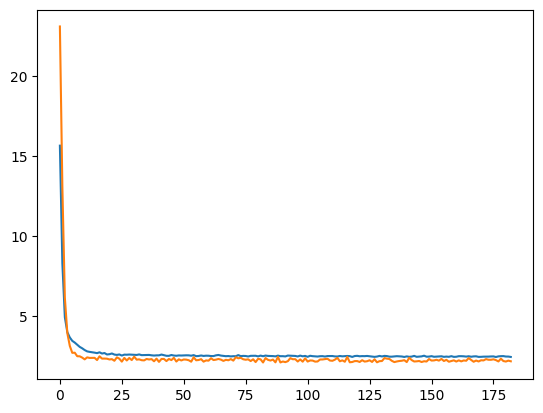

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(0.4198)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-3.9263)


In [21]:
print(vi.h_min_tilde)

-6.021399


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.7014135043017562
tensor([1.2925])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

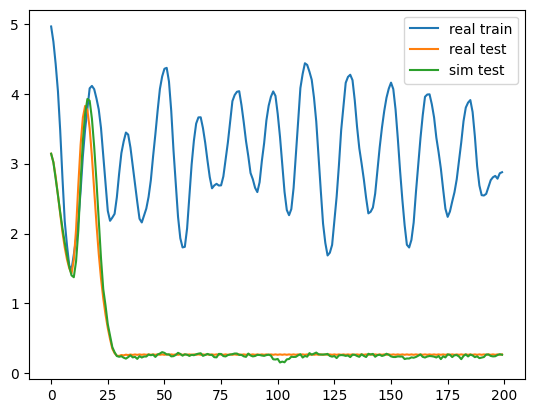

encoder [ 4.4424586 -8.       ]
initial_belief tensor([ 4.3934, -3.9736])
real train tensor([ 4.4332, -8.0000])
real test tensor([ 4.4653, -8.0000])
sim tensor([ 4.4619, -8.0066])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-1.0


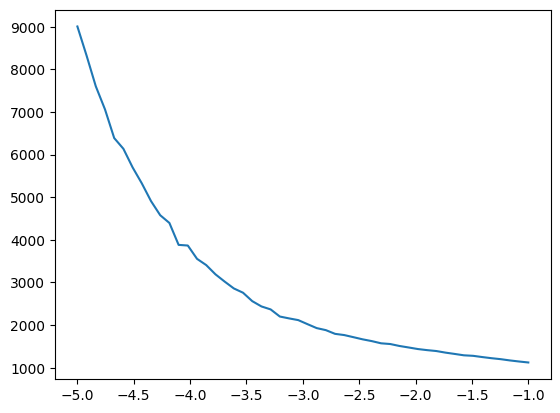

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.16017626086562345
tensor([-1.1499])
